# Análisis descriptivo

## Importanto las librerias

In [34]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sweetviz as sv

from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Analisis

Leyendo los datos limpios

In [20]:
df = pd.read_csv('../database/tetuan-pc.csv')
df

datetime   temp  humi     ws    gdf     df        z1-pc  \
0      2017-01-01 00:00:00  6.559  73.8  0.083  0.051  0.119  34055.69620   
1      2017-01-01 00:10:00  6.414  74.5  0.083  0.070  0.085  29814.68354   
2      2017-01-01 00:20:00  6.313  74.5  0.080  0.062  0.100  29128.10127   
3      2017-01-01 00:30:00  6.121  75.0  0.083  0.091  0.096  28228.86076   
4      2017-01-01 00:40:00  5.921  75.7  0.081  0.048  0.085  27335.69620   
...                    ...    ...   ...    ...    ...    ...          ...   
52411  2017-12-30 23:10:00  7.010  72.4  0.080  0.040  0.096  31160.45627   
52412  2017-12-30 23:20:00  6.947  72.6  0.082  0.051  0.093  30430.41825   
52413  2017-12-30 23:30:00  6.900  72.8  0.086  0.084  0.074  29590.87452   
52414  2017-12-30 23:40:00  6.758  73.0  0.080  0.066  0.089  28958.17490   
52415  2017-12-30 23:50:00  6.580  74.1  0.081  0.062  0.111  28349.80989   

             z2-pc        z3-pc  year  month  day  hour  minute  
0      16128.87538  20240.96386  2017      1    1     0       0  
1      19375.07599  20131.08434  2017      1    1     0      10  
2      19006.68693  19668.43373  2017      1    1     0      20  
3      18361.09422  18899.27711  2017      1    1     0      30  
4      17872.34043  18442.40964  2017      1    1     0      40  
...            ...          ...   ...    ...  ...   ...     ...  
52411  26857.31820  14780.31212  2017     12   30    23      10  
52412  26124.57809  14428.81152  2017     12   30    23      20  
52413  25277.69254  13806.48259  2017     12   30    23      30  
52414  24692.23688  13512.60504  2017     12   30    23      40  
52415  24055.23167  13345.49820  2017     12   30    23      50  

[52416 rows x 14 columns]

Informacion general del dataframe

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  52416 non-null  object 
 1   temp      52416 non-null  float64
 2   humi      52416 non-null  float64
 3   ws        52416 non-null  float64
 4   gdf       52416 non-null  float64
 5   df        52416 non-null  float64
 6   z1-pc     52416 non-null  float64
 7   z2-pc     52416 non-null  float64
 8   z3-pc     52416 non-null  float64
 9   year      52416 non-null  int64  
 10  month     52416 non-null  int64  
 11  day       52416 non-null  int64  
 12  hour      52416 non-null  int64  
 13  minute    52416 non-null  int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 5.6+ MB


Descripcion general del dataframe

In [21]:
df.describe()

temp          humi            ws           gdf            df  \
count  52416.000000  52416.000000  52416.000000  52416.000000  52416.000000   
mean      18.810024     68.259518      1.959489    182.696614     75.028022   
std        5.815476     15.551177      2.348862    264.400960    124.210949   
min        3.247000     11.340000      0.050000      0.004000      0.011000   
25%       14.410000     58.310000      0.078000      0.062000      0.122000   
50%       18.780000     69.860000      0.086000      5.035500      4.456000   
75%       22.890000     81.400000      4.915000    319.600000    101.000000   
max       40.010000     94.800000      6.483000   1163.000000    936.000000   

              z1-pc         z2-pc         z3-pc     year         month  \
count  52416.000000  52416.000000  52416.000000  52416.0  52416.000000   
mean   32344.970564  21042.509082  17835.406218   2017.0      6.510989   
std     7130.562564   5201.465892   6622.165099      0.0      3.440642   
min    13895.696200   8560.081466   5935.174070   2017.0      1.000000   
25%    26310.668692  16980.766032  13129.326630   2017.0      4.000000   
50%    32265.920340  20823.168405  16415.117470   2017.0      7.000000   
75%    37309.018185  24713.717520  21624.100420   2017.0      9.250000   
max    52204.395120  37408.860760  47598.326360   2017.0     12.000000   

                day          hour        minute  
count  52416.000000  52416.000000  52416.000000  
mean      15.678571     11.500000     25.000000  
std        8.771822      6.922253     17.078414  
min        1.000000      0.000000      0.000000  
25%        8.000000      5.750000     10.000000  
50%       16.000000     11.500000     25.000000  
75%       23.000000     17.250000     40.000000  
max       31.000000     23.000000     50.000000

Diversas graficas relacionando las diferentes variables del dataframe

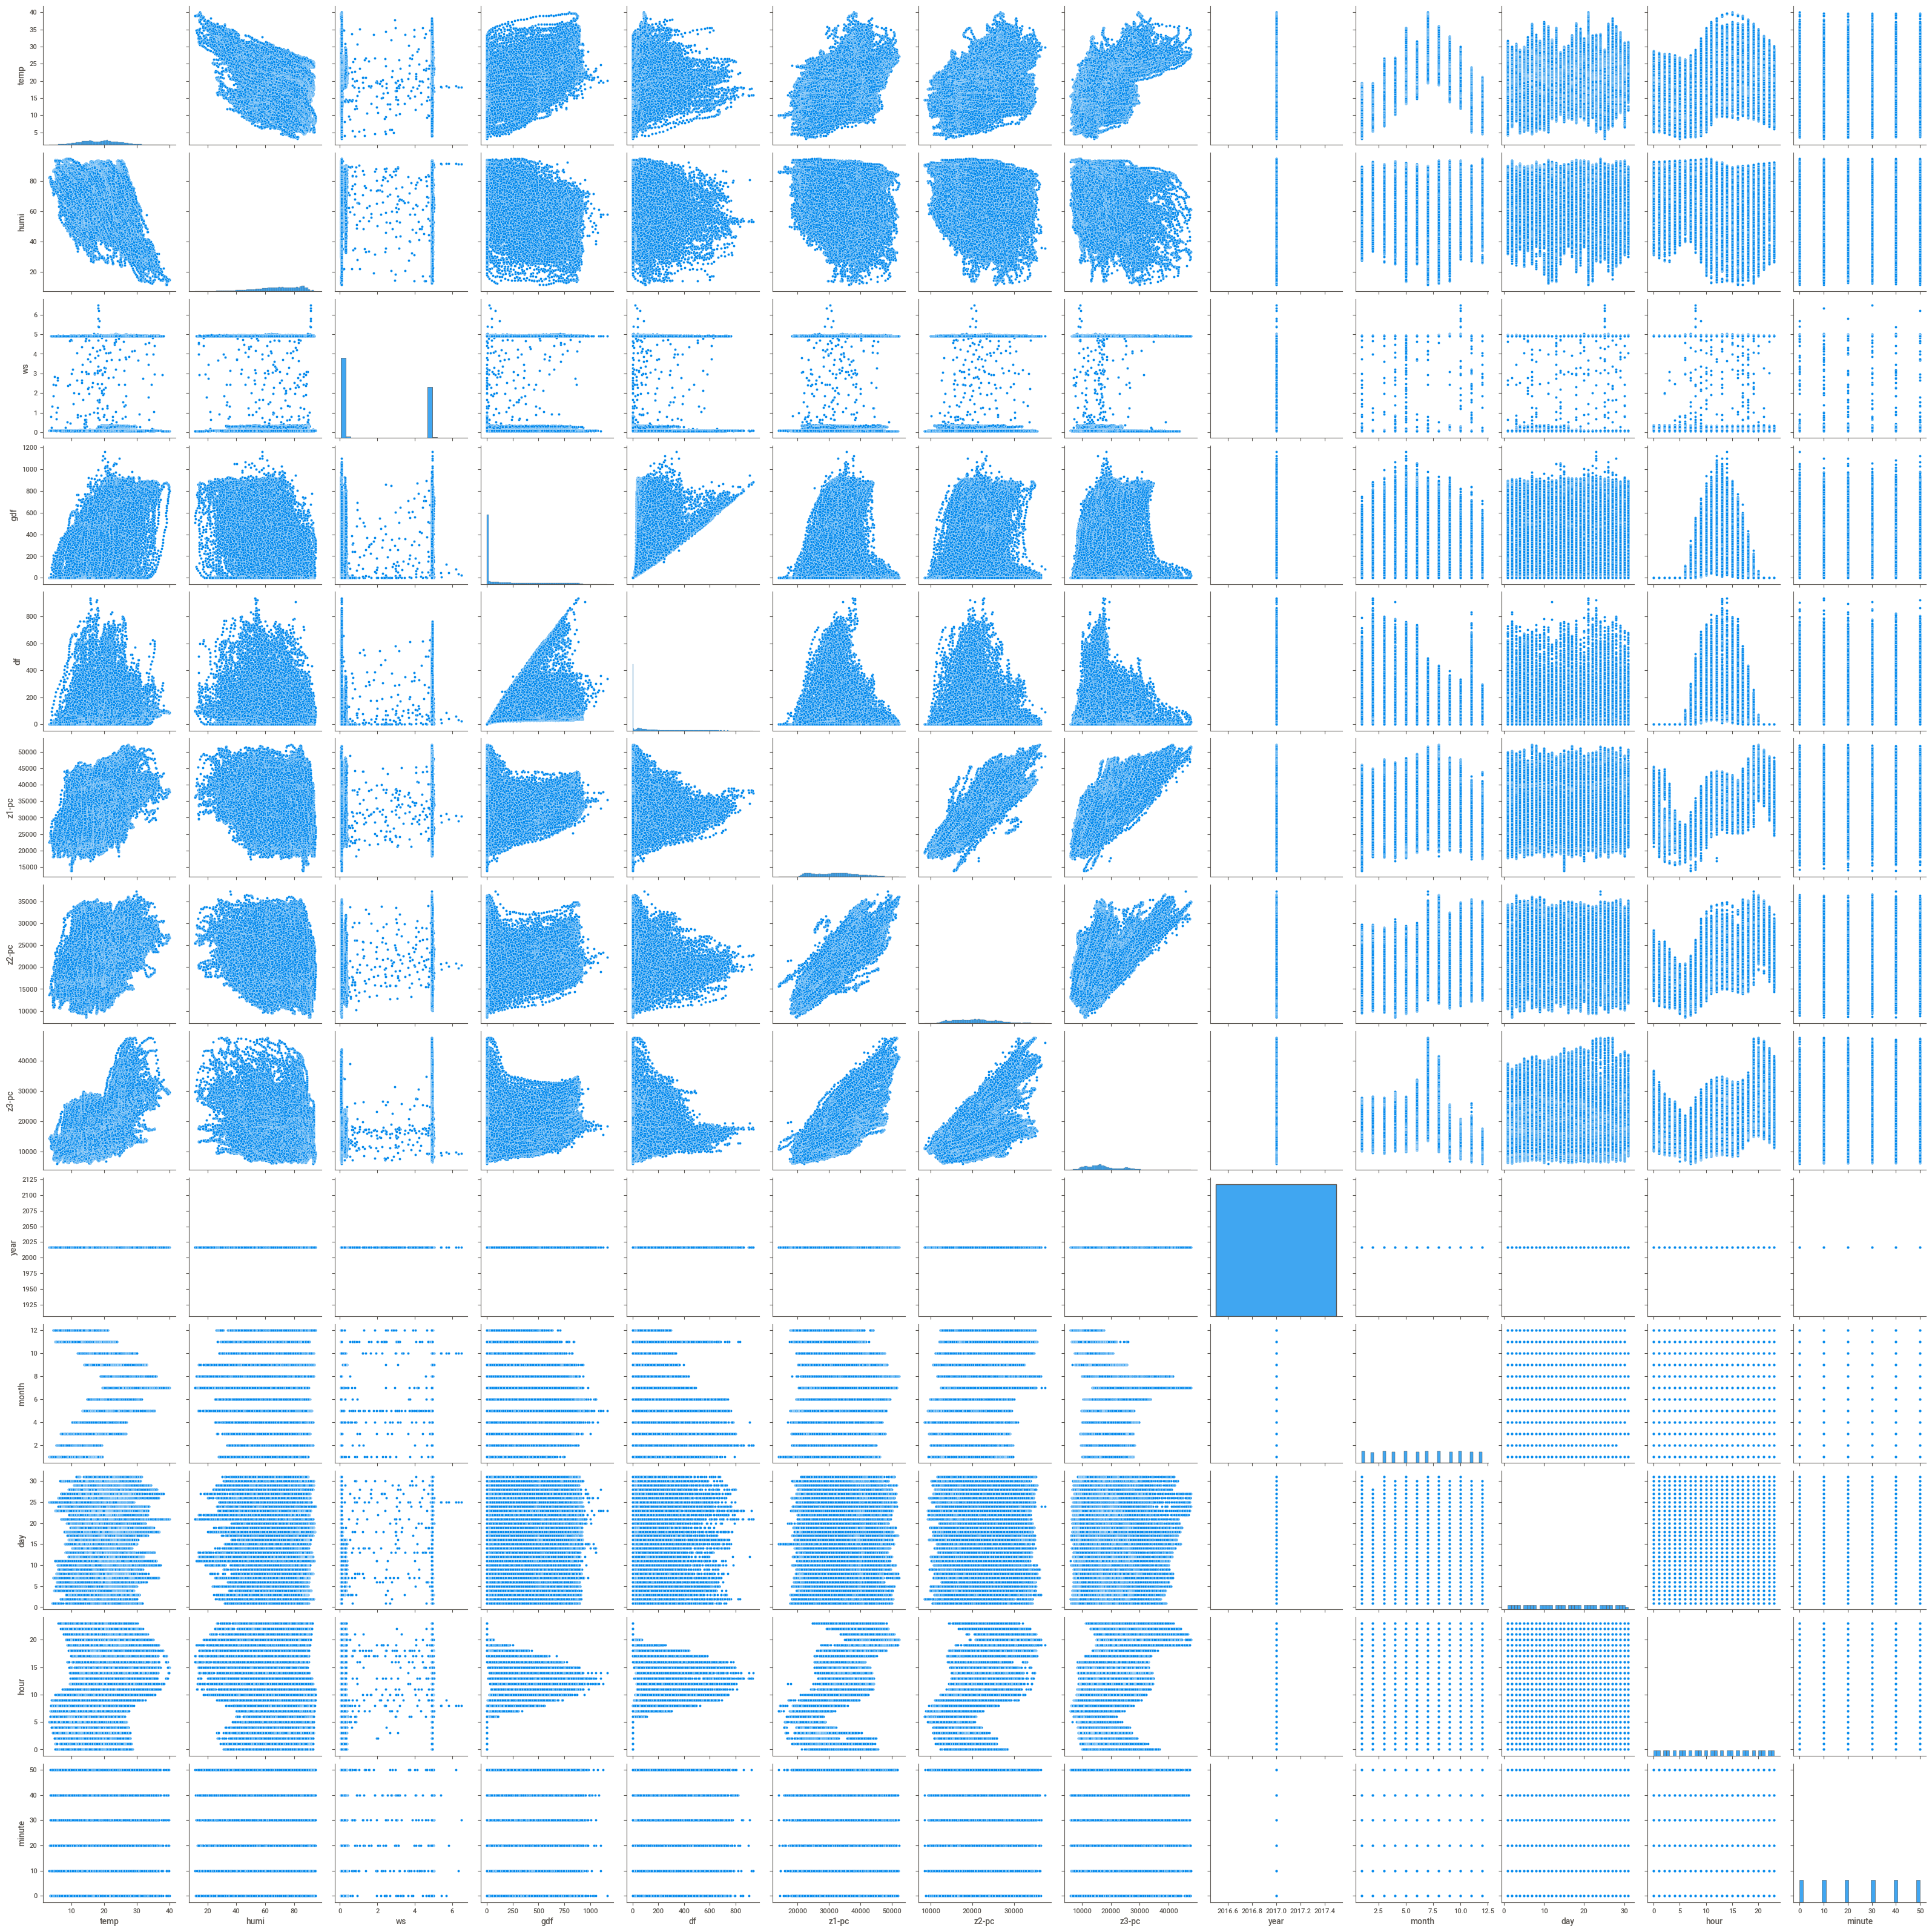

In [22]:
sns.pairplot(df)
plt.show()

Matriz de correlacion, no existe una correlacion fuerte entre las diversas variables, se decide que todas las `features` son importantes para describir las variables `targets`

In [28]:
columns_features = ['temp', 'humi', 'ws', 'gdf', 'df', 'year', 'month', 'day', 'hour', 'minute']
corr_matrix = df[columns_features].corr()
corr_matrix

temp      humi        ws       gdf        df  year         month  \
temp    1.000000 -0.460243  0.477109  0.460294  0.196522   NaN  2.843350e-01   
humi   -0.460243  1.000000 -0.135853 -0.468138 -0.256886   NaN -1.741931e-02   
ws      0.477109 -0.135853  1.000000  0.133733 -0.000972   NaN  1.683554e-01   
gdf     0.460294 -0.468138  0.133733  1.000000  0.564718   NaN -2.055450e-02   
df      0.196522 -0.256886 -0.000972  0.564718  1.000000   NaN -1.297793e-01   
year         NaN       NaN       NaN       NaN       NaN   NaN           NaN   
month   0.284335 -0.017419  0.168355 -0.020554 -0.129779   NaN  1.000000e+00   
day     0.019268 -0.045403  0.164067  0.032253 -0.028278   NaN  4.349864e-03   
hour    0.197130 -0.242692  0.004149  0.129977  0.130909   NaN -5.911819e-16   
minute -0.000067  0.000493 -0.000314 -0.000191 -0.001828   NaN  7.656370e-15   

                 day          hour        minute  
temp    1.926774e-02  1.971305e-01 -6.724601e-05  
humi   -4.540307e-02 -2.426916e-01  4.929864e-04  
ws      1.640667e-01  4.148645e-03 -3.136897e-04  
gdf     3.225334e-02  1.299766e-01 -1.913001e-04  
df     -2.827775e-02  1.309090e-01 -1.828407e-03  
year             NaN           NaN           NaN  
month   4.349864e-03 -5.911819e-16  7.656370e-15  
day     1.000000e+00 -9.891896e-17  5.189888e-16  
hour   -9.891896e-17  1.000000e+00  1.912651e-17  
minute  5.189888e-16  1.912651e-17  1.000000e+00

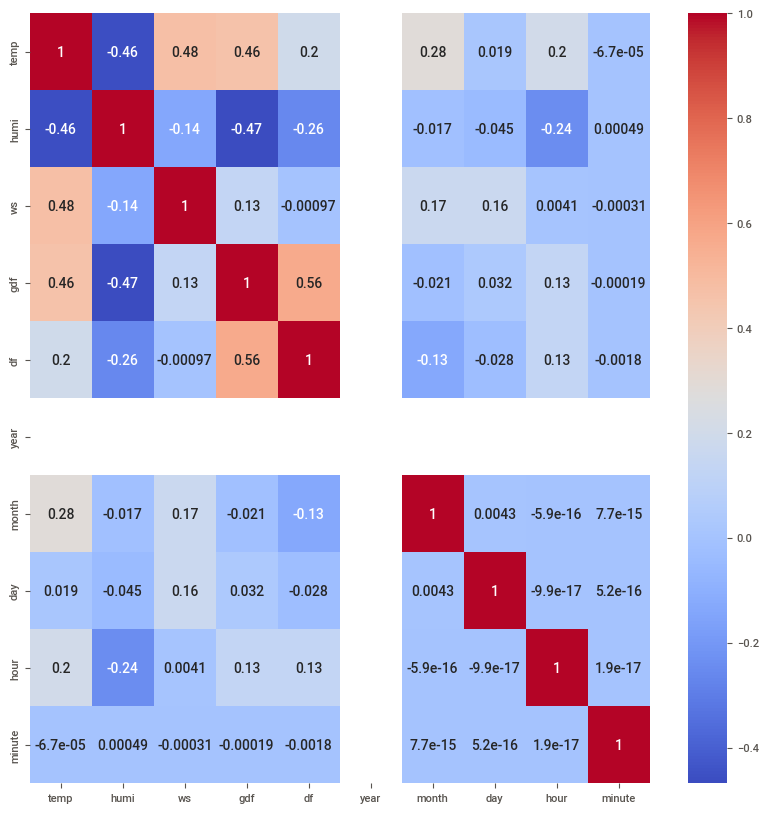

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Segun lo encontrado en la grafica de correlacion se evidencia que: la mayor correlacion de los datos se encuentran en las temperaturas entre las 3 zonas, otra condicion que se muestra relevante es la velocidad del viento en donde se evidencia un comprotamiento importante para la zona 3.

Generando un reporte resumen con la libreria de `sweetviz`

In [ ]:
report = sv.analyze(df)
report.show_html()